In [106]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import zscore

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [107]:
sp500_train = pd.read_csv('Datasets/sp500_train.csv', index_col='Date', parse_dates=True)
sp500_test = pd.read_csv('Datasets/sp500_test.csv', index_col='Date', parse_dates=True)
tesla_train = pd.read_csv('Datasets/tesla_train.csv', index_col ='Date', parse_dates=True)
tesla_test = pd.read_csv('Datasets/tesla_test.csv', index_col='Date', parse_dates=True)

sp500_train.head()

,SP500_Close
Date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


In [108]:
# Preprocess the data for the Prophet model
sp500_train = sp500_train.reset_index()
sp500_test = sp500_test.reset_index()
sp500_train.rename(columns={'Date': 'ds', 'SP500_Close': 'y'}, inplace=True)
sp500_test.rename(columns={'Date': 'ds', 'SP500_Close': 'y'}, inplace=True)

print(sp500_train.head())
print(sp500_test.head())
tesla_train = tesla_train.reset_index()
tesla_test = tesla_test.reset_index()
tesla_train.rename(columns={'Date': 'ds', 'Tesla_Close': 'y'}, inplace=True)
tesla_test.rename(columns={'Date': 'ds', 'Tesla_Close': 'y'}, inplace=True)

          ds            y
0 2015-01-02  2058.199951
1 2015-01-05  2020.579956
2 2015-01-06  2002.609985
3 2015-01-07  2025.900024
4 2015-01-08  2062.139893
          ds            y
0 2023-01-03  3824.139893
1 2023-01-04  3852.969971
2 2023-01-05  3808.100098
3 2023-01-06  3895.080078
4 2023-01-09  3892.090088


In [ ]:
# Modeling with Prophet
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.fit(sp500_train)


16:15:52 - cmdstanpy - INFO - Chain [1] start processing
python(904) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
16:15:52 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Prediction for the test set
forecast_sp500 = model.predict(sp500_test)

# Match predictions to actual test dates
forecast_matched = forecast_sp500[forecast_sp500['ds'].isin(sp500_test['ds'])]

comparison = pd.merge(sp500_test,forecast_matched[['ds', 'yhat']], on='ds')


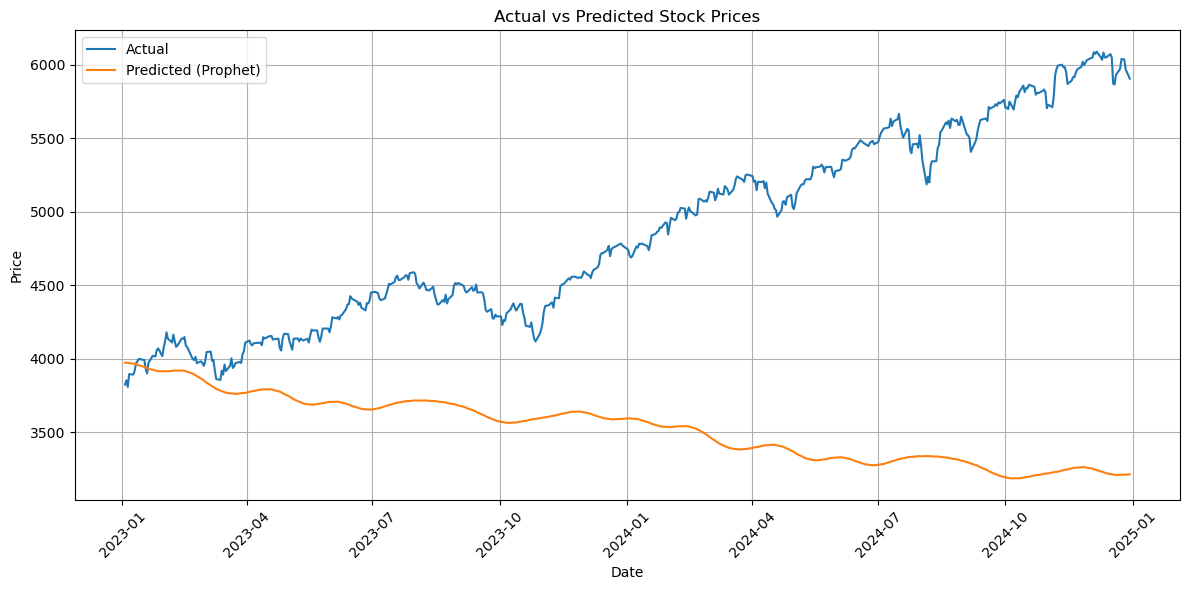

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(comparison['ds'], comparison['y'], label='Actual')
plt.plot(comparison['ds'], comparison['yhat'], label='Predicted (Prophet)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()